# 컨텐츠 기반 필터링 추천 시스템

**컨텐츠 기반 필터링 추천 시스템**
- 사용자가 특정한 아이템을 매우 선호하는 경우
- 그 아이템과 비슷한 컨텐츠를 가진 다른 아이템을 추천하는 방식

    - 예: 특정 영화에 높은 평점을 주었다면
    - 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 컨텐츠와 유사한 다른 영화 추천

    - 컨텍트 : 8점
    - 프로메테우스 : 9점
    - 컨텍트와 프로메테우스의 장르, 감독, 출연 배우, 키워드 등의 컨텐츠를 감안해 
    - 이와 유사한 영화 추천

    - 컨텍트 
        - 장르 : SF, 미스터리
        - 영화 감독 : 드니 빌뇌브

    - 프로메테우스 
        - 장르 : SF, 액션, 스틸러
        - 영화 감독 : 리들리 스콧ㅡ

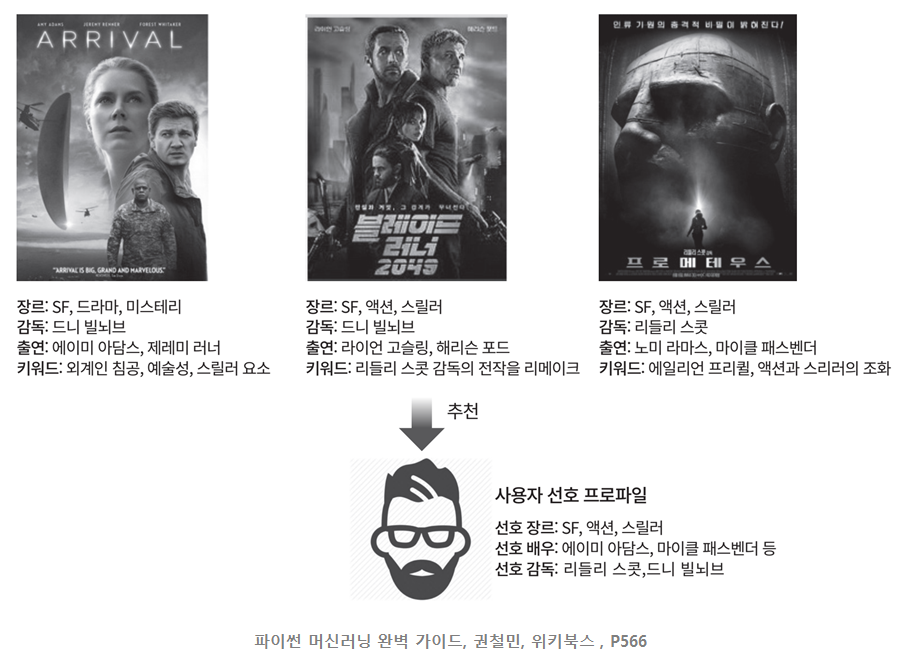

컨텐츠 기반 필터링 구현 프로세스  
(1) 컨텐츠에 대한 여러 텍스트 정보들을 피처 벡터화      
(2) 코사인 유사도로 **컨텐츠별** 유사도 계산  
(3) 컨텐츠 별로 **가중 평점** 계산  
(4) 유사도가 높은 컨텐츠 중에 평점이 좋은 컨텐츠 순으로 추천

**피처 벡터화**
- 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환하는 것
- (머신러닝 알고리즘은 일반적으로 숫자형 피처를 데이터로 입력받아 동작
- 텍스트 등의 데이터는 머신러닝 알고리즘에 바로 입력 불가하기 때문
- 텍스트를 단어로 추출해 피처로 할당하고
- 각 단어의 발생 빈도와 같은 값을 피처에 부여해서
- 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법
- 피처 벡터화는 기존 텍스트 데이터를 또 다른 형태의 피처의 조합으로 변경하기 때문에
- 넓은 의미의 피처 추출에 포함

**피처 벡터화 방식**
- 카운드 기반의 벡터화
- TF-IDF(Term Frequency-Inverse Document Frequency) 기반의 벡터화

카운트 기반의 벡터화
- 단어 피처에 값을 부여할 때 단어의 빈도 수, 즉 Count를 부여하는 것
- 카운트 값이 높을수록 중요 단어로 인식

- 카운트만 부여할 경우 그 단어의 특징을 나타내기 보다는 
- 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여하게 됨

- 보완 : TF-IDF 벡터화

#### TF-IDF(Term Frequency-Inverse Document Frequency) 기반의 벡터화  

- 개별 문서에서 자주 나타나는 단어에 높은 가중치
- 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여

- 어떤 문서에서 특정 단어가 자주 나타나면 그 단어는 해당 문서를 특징짓는 중요 단어일 수 있음
- 그러나 그 단어가 다른 문서에서도 자주 나타나는 단어라면 
- 해당 단어는 언어 특성상 범용적으로 자주 사용되는 단어일 가능성이 높음


- 예: 여러 뉴스 문서에서 '분쟁', '종교 대립', '유혈 사태' 같은 단어가 자주 나타나는 경우
    - 해당 문서는 지역 분쟁과 관련된 뉴스일 가능성이 높고
        - 해당 단어는 그 문서의 특징을 잘 나타낸다고 할 수 있음
    - 그러나 '많은', '빈번하게', '당연히', '조직', '업무' 등과 같은 단어는
        - 문서의 특징과 관련성이 적지만 보편적으로 많이 사용되기 때문에
        - 문서에 반복적으로 사용될 가능성이 높음
    - 이러한 단어는 단순히 등장하는 횟수에 따라 중요도로 평가받는다면 
        - 문서를 특징짓기 어려움
        - 따라서 모든 문서에서 반복적으로 자주 발생하는 단어에 대해서는
        - 패널티를 부여하는 방식으로 단어에 대한 가중치의 균형을 맞춤
    - 문서마다 텍스트가 길고 문서의 개수가 많은 경우
        - 카운드 방식보다는 TF-IDF 방식을 사용하는 것이 더 좋은 예측 성능을 보장할 수 있음

코사인 유사도 계산

- 벡터와 벡터 간의 코사인 각도를 이용하여 유사도 산정
    - 벡터는 단어를 수치화한 값으로 결정되어짐
- 즉, 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

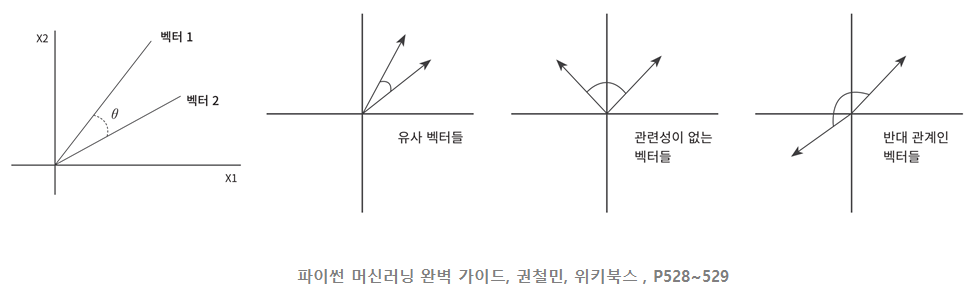

- 두 벡터의 방향이 
    - 완전히 동일한 경우 : 1
    - 90°: 0  (상관관계 없음)
    - 180°: -1 (완전 반대)

- 피처 벡터 행렬은 음수값이 없으므로
    - 코사인 유사도는 음수가 되지 않고
    - 0~1 사이의 값으로 1에 가까울수록 유사도가 높다고 판단

#### ex. 벡터값을 행렬로 표현하고
    - 배열 A,B의 값을 수식에 적용해서 유사도 구함

In [1]:
cols = ['사과','바나나','과일','좋아요']
A=[1,3,0,2]
B=[2,0,2,4]

In [2]:
import pandas as pd
df = pd.DataFrame([A,B],columns=cols,index=['A','B'])

In [3]:
df

,사과,바나나,과일,좋아요
A,1,3,0,2
B,2,0,2,4


코사인 각도 계산 - cosine_similarity()
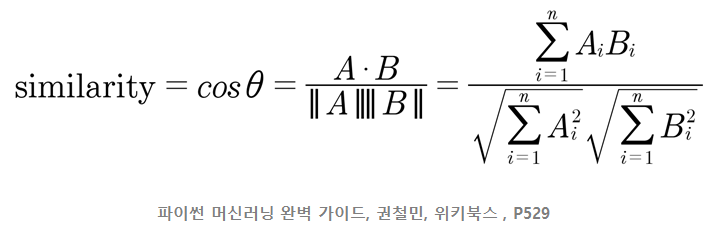

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
df.values

array([[1, 3, 0, 2],
       [2, 0, 2, 4]], dtype=int64)

In [5]:
cosine_similarity(df.values)

array([[1.        , 0.54554473],
       [0.54554473, 1.        ]])

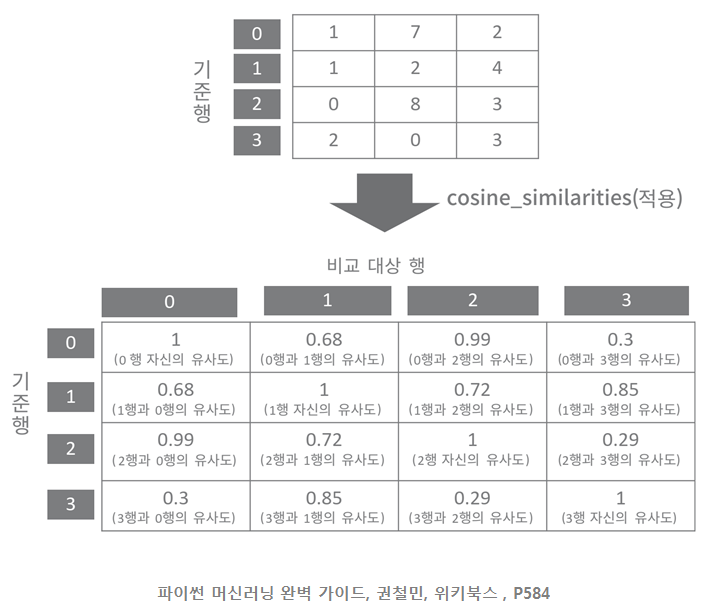

- TMDB 5000 영화 데이터 세트 사용
    - 유명한 영화 데이터 정보 사이트인 IMDB의 많은 영화 중 
    - 주요 5000개 영화에 대한 메타 정보를 새롭게 가공해 캐글에서 제공하는 데이터 세트
    - www.kaggle.com/tmdb/tmdb-movie-metadata
    - tmdb_5000_credits.csv와 tmdb_5000_movies.csv 두 개의 파일 다운로드

###  컨텐츠 기반 필터링 실습 – TMDB 5000 Movie Dataset

- tmdb_5000_movies.csv만 사용  

In [25]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

# movies =pd.read_csv('./tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
movies =pd.read_csv('./data/tmdb_5000_movies.csv')
print(movies.shape) # (4803개의 레코드와 20개의 피처로 구성)
movies.head(1)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United ...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800


### 데이터 설명
- 장르, 키워드, 평점평균, 평점수,영화개요
- 추천은 영화 장르 속성을 기반으로 추천
    - 장류와 유사도가 높은 영화를 추천 
        - 장르값의 유사도를 비교한 뒤 
        - 유사도가 높은 영화 중 평점이 높은 영화를 추천

In [26]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [27]:
# 주요 컬럼 추출
# 장르, 평점평균, 평점 투표수, 키워드
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']]

In [28]:
pd.set_option('max_colwidth',100) # 컬럼의 넓이를 100만큼 넓혀서 표시
movies_df[['genres','keywords']].head(2)

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is..."


In [29]:
movies_df.info()
 # genres 데이터 타입 : object - 문자열 형태

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   popularity    4803 non-null   float64
 6   keywords      4803 non-null   object 
 7   overview      4800 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 300.3+ KB


In [30]:
movies_df['genres'][0]
# type(movies_df['genres'][0])

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

- genres 피처에서 다른 데이터 제거 하고 장르명만 추출
- 현재는 문자열로 되어 있음(내부 구조는 파이썬 객체[{}]형태로 되어 있음)

파이썬 ast 모듈의 literal_eval() 함수를 이용해서  
문자열을 파이썬 객체로 변환 해 주는 함수
Series 객체의 apply() 함수에 literal_eval() 함수를 적용해 문자열을 객체로 변환  

In [31]:
from ast import literal_eval
# 문자열이었던 데이터를 파이썬 자료구조인 list로 변환
movies_df['genres'] = movies_df['genres'].apply(literal_eval)

In [32]:
movies_df['genres']

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {...
1            [{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}]
2              [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, 'name': 'Crime'}]
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': ...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fic...
                                                       ...                                                 
4798            [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 53, 'name': 'Thriller'}]
4799                                       [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'...
4801                        

In [33]:
type(movies_df['genres'][0])

list

In [34]:
movies_df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

- 0번 영화의 장르는 Action, Adventure, Fantasy, Science Fiction 임

In [35]:
movies_df['genres'][0][0]['name']

'Action'

In [36]:
for x in movies_df['genres']:
    for y in x:
        print(y['name'])
    break

Action
Adventure
Fantasy
Science Fiction


- 따로 분리되어 있는 영화의 장르들을 하나의 list로 합치기

In [38]:
# movie_df['genres']에 있는 값 한개씩 추출해서 apply() 내에 있는 함수에 적용시킴

movies_df['genres'].apply(lambda x:[y['name'] for y in x])


0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [39]:
movies_df['genres'].head(1)

0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {...
Name: genres, dtype: object

- 총 장르가 얼마나 되는지 확인하기 위해 모든 샘플의 장르를 하나의 list에 결합

In [40]:
lis = []
for li in movies_df['genres'] : # 영화별 장르가 list형태로 저장되어 있음
    lis.extend(li) # 모든 영화의 장르를 하나의 list로 결합
    


In [41]:
lis
# set함수(집합을 만드는 함수로 집합은 중복데이터를 허용하지 않으므로 중복데이터는 자동 제거됨)
          # 총 20개의 장르

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 28, 'name': 'Action'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 80, 'name': 'Crime'},
 {'id': 28, 'name': 'Action'},
 {'id': 80, 'name': 'Crime'},
 {'id': 18, 'name': 'Drama'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 10751, 'name': 'Family'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 10751, 'name': 'Family'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'i

## (2) 컨텐츠에 대한 여러 텍스트 정보들을 피처 벡터화

장르 문자열의 Count기반 피처 벡터화
- 리스트로 구성되어 있는 genres를 문자열로 변경한 뒤
- Count 기반 피처 벡터화 변환 (행렬로 변환)

In [43]:
# 각 레코드의 장르 데이터를 문자열로 변환
# (' ').join(movies_df['genres'][0])
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' '.join(x)))


TypeError: sequence item 0: expected str instance, dict found

In [38]:
movies_df['genres_literal'][0]

'Action Adventure Fantasy Science Fiction'

In [41]:
movies_df.head()

,id,title,genres,vote_average,vote_count,popularity,keywords,overview,genres_literal
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",7.2,11800,150.437577,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...","In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",Action Adventure Fantasy Science Fiction
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,4500,139.082615,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...","Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",Adventure Fantasy Action
2,206647,Spectre,"[Action, Adventure, Crime]",6.3,4466,107.376788,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret...",A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,Action Adventure Crime
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,9106,112.312950,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853, ""name"": ""crime fighter""}, {""id"": 949, ""name"": ""te...","Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...",Action Crime Drama Thriller
4,49529,John Carter,"[Action, Adventure, Science Fiction]",6.1,2124,43.926995,"[{""id"": 818, ""name"": ""based on novel""}, {""id"": 839, ""name"": ""mars""}, {""id"": 1456, ""name"": ""medal...","John Carter is a war-weary, former military captain who's inexplicably transported to the myster...",Action Adventure Science Fiction


In [44]:
# termmatrix 생성
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환

- ngram_range = (1,2) : 추출된 단어들의 조합 여부
- 'Action Adventure Fantasy Science Fiction
    - Action, Adventure, Fantasy, Science, Fiction 다섯개의 피처 추출
    - 단어를 기준으로 바로 옆단어까지 결합해서 피처 추출
        -Action Adventure, Adventure Fantasy, Fantasy Science, Science fiction

In [42]:
count_vect = CountVectorizer(min_df = 0, ngram_range = (1,2))
count_vect.fit(movies_df['genres_literal'])

CountVectorizer(min_df=0, ngram_range=(1, 2))

In [43]:
movies_df['genres'].head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [44]:
count_vect.get_feature_names() # count_vect가 구성한 피처명

['action',
 'action adventure',
 'action animation',
 'action comedy',
 'action crime',
 'action drama',
 'action family',
 'action fantasy',
 'action history',
 'action horror',
 'action mystery',
 'action romance',
 'action science',
 'action thriller',
 'action war',
 'action western',
 'adventure',
 'adventure action',
 'adventure animation',
 'adventure comedy',
 'adventure crime',
 'adventure documentary',
 'adventure drama',
 'adventure family',
 'adventure fantasy',
 'adventure history',
 'adventure horror',
 'adventure mystery',
 'adventure romance',
 'adventure science',
 'adventure thriller',
 'adventure war',
 'adventure western',
 'animation',
 'animation action',
 'animation adventure',
 'animation comedy',
 'animation drama',
 'animation family',
 'animation fantasy',
 'animation music',
 'animation mystery',
 'animation science',
 'animation war',
 'comedy',
 'comedy action',
 'comedy adventure',
 'comedy animation',
 'comedy crime',
 'comedy documentary',
 'comedy dram

In [45]:
count_vect.vocabulary_

{'action': 0,
 'adventure': 16,
 'fantasy': 124,
 'science': 232,
 'fiction': 138,
 'action adventure': 1,
 'adventure fantasy': 24,
 'fantasy science': 135,
 'science fiction': 233,
 'fantasy action': 125,
 'crime': 64,
 'adventure crime': 20,
 'drama': 90,
 'thriller': 234,
 'action crime': 4,
 'crime drama': 68,
 'drama thriller': 106,
 'adventure science': 29,
 'animation': 33,
 'family': 109,
 'animation family': 38,
 'fantasy family': 130,
 'action science': 12,
 'adventure action': 17,
 'action thriller': 13,
 'thriller crime': 238,
 'western': 265,
 'adventure western': 32,
 'adventure family': 23,
 'family fantasy': 115,
 'fiction action': 139,
 'action fantasy': 7,
 'comedy': 44,
 'action comedy': 3,
 'comedy science': 59,
 'adventure drama': 22,
 'drama action': 91,
 'romance': 214,
 'drama romance': 104,
 'romance thriller': 228,
 'thriller action': 235,
 'fiction thriller': 150,
 'adventure thriller': 30,
 'fantasy adventure': 126,
 'family adventure': 111,
 'adventure com

In [46]:
# 장르 리터럴 컬럼을 피처 베터화
count_vect.transform(movies_df['genres_literal'])
# print(genre_mat.shape)

(4803, 276)


In [47]:
cols =count_vect.get_feature_names()
data = genre_mat.toarray()
pd.DataFrame(data,columns=cols)
df.head(2)

,action,action adventure,action animation,action comedy,action crime,action drama,action family,action fantasy,action history,action horror,...,western action,western adventure,western animation,western comedy,western crime,western drama,western history,western music,western romance,western thriller
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.iloc[0][df.iloc[0] == 1]

### (3) 코사인 유사도로 컨텐츠별 유사도 계산
**장르에 따른 영화별 코사인 유사도 추출**

In [48]:
# 사이킷런의 cosine_similarity() 함수를 이용해 코사인 유사도 계산

from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat) # 유사도 행렬
print(genre_sim.shape) # 유사도 행렬의 크기
print(genre_sim[:2]) # 앞 2개만 확인


(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


In [49]:
genre_sim

array([[1.        , 0.59628479, 0.4472136 , ..., 0.        , 0.        ,
        0.        ],
       [0.59628479, 1.        , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.4472136 , 0.4       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [51]:
cols = movies_df.title
pd.DataFrame(data=genre_sim,columns=cols,index=cols)

title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,
Avatar,1.000000,0.596285,0.447214,0.125988,0.755929,0.596285,0.0,0.755929,0.447214,0.745356,...,0.000000,0.000000,0.000000,0.377964,0.000000,0.149071,0.0000,0.000000,0.0,0.0
Pirates of the Caribbean: At World's End,0.596285,1.000000,0.400000,0.169031,0.338062,0.800000,0.0,0.338062,0.600000,0.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.0000,0.000000,0.0,0.0
Spectre,0.447214,0.400000,1.000000,0.338062,0.507093,0.600000,0.0,0.507093,0.200000,0.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.0000,0.000000,0.0,0.0
The Dark Knight Rises,0.125988,0.169031,0.338062,1.000000,0.142857,0.169031,0.0,0.142857,0.000000,0.169031,...,0.377964,0.169031,0.377964,0.428571,0.218218,0.676123,0.0000,0.125988,0.0,0.0
John Carter,0.755929,0.338062,0.507093,0.142857,1.000000,0.507093,0.0,1.000000,0.169031,0.507093,...,0.000000,0.000000,0.000000,0.428571,0.000000,0.169031,0.0000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
El Mariachi,0.149071,0.200000,0.400000,0.676123,0.169031,0.200000,0.0,0.169031,0.000000,0.200000,...,0.000000,0.200000,0.000000,0.169031,0.258199,1.000000,0.0000,0.000000,0.0,0.0
Newlyweds,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.258199,0.000000,0.000000,0.000000,0.000000,1.0000,0.384900,0.0,0.0
"Signed, Sealed, Delivered",0.000000,0.000000,0.000000,0.125988,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.333333,0.149071,0.333333,0.125988,0.000000,0.000000,0.3849,1.000000,0.0,0.0


#### genre_sim 
- movies_df의 genre_literal 칼럼을 피처 벡터화한 
- 행렬 genre_mat 데이터의 행별 유사도 정보를 가지고 있음
- 즉, movies_df 데이터프레임의 행렬 장르 유사도 값을 가지고 있음

- movies_df를 장르 기준으로 컨텐츠 기반 필터링을 수행하려면
- movies_df의 개별 레코드에 대해서 
    - 가장 장르 유사도가 높은 순으로 다른 레코드를 추출해야 하는데
    - 이때 생성된 genre_sim 객체 이용

- genre_sim 객체의 기준 행렬로 비교 대상이 되는 행의 
    - 유사도 값이 높은 순으로 정렬된 행렬의 위치 인텍스 값을 추출하면 됨

**주의!!**
- 값이 높은 순으로 정렬된 비교 대상 행의 유사도 값이 아니라
    - 비교 대상 행의 위치 인덱스임에 주의 
    - 높은 순 (내림차순 정렬)
    - 정렬 후 위치 인덱스를 반환하는 함수가 필요 : argsort()

In [45]:
# argsort() : 배열을 오름차순 정렬하기 위한 index 값을 배열로 반환
import numpy as np 
a = np.array([5,9,3,7])
a.argsort()

array([2, 0, 3, 1], dtype=int64)

In [46]:
# 행은 그대로, 열로 내림차순 정렬
genre_sim.argsort()[:,::-1]

NameError: name 'genre_sim' is not defined

In [52]:
 # 0번 레코드 : 아바타
genre_sim.argsort()[:,::-1][0]

array([   0, 3494,  813, ..., 3038, 3037, 2401], dtype=int64)

In [53]:
# Avatar와 유사도가 높은
movies_df.iloc[[3494, 813]]

,id,title,genres,vote_average,vote_count,popularity,keywords,overview,genres_literal
3494,27549,Beastmaster 2: Through the Portal of Time,"[Action, Adventure, Fantasy, Science Fiction]",4.6,17,1.478505,"[{""id"": 818, ""name"": ""based on novel""}, {""id"": 4379, ""name"": ""time travel""}, {""id"": 9663, ""name""...","Mark Singer returns as Dar, the warrior who can talk to the beasts. Dar is forced to travel to e...",Action Adventure Fantasy Science Fiction
813,1924,Superman,"[Action, Adventure, Fantasy, Science Fiction]",6.9,1022,48.507081,"[{""id"": 83, ""name"": ""saving the world""}, {""id"": 736, ""name"": ""journalist""}, {""id"": 849, ""name"": ...","Mild-mannered Clark Kent works as a reporter at the Daily Planet alongside his crush, Lois Lane ...",Action Adventure Fantasy Science Fiction


In [54]:
#Avartar와 유사도가 낮은
movies_df.iloc[[3038, 3037, 2401]]

,id,title,genres,vote_average,vote_count,popularity,keywords,overview,genres_literal
2401,31932,City of Ghosts,[Thriller],5.4,18,2.644860,[],A con man (Dillon) travels to Cambodia (also on the run from law enforcement in the U.S.) to col...,Thriller
3037,19905,"The Goods: Live Hard, Sell Hard",[Comedy],5.4,58,3.352702,"[{""id"": 179431, ""name"": ""duringcreditsstinger""}]",Who is Don Ready? Salesman? Lover? Song Stylist? Semi-professional dolphin trainer? Ready is all...,Comedy
3038,17710,Hey Arnold! The Movie,"[Animation, Family]",5.6,62,5.856363,[],When a powerful developer named Mr. Scheck wants to knock down all the stores and houses in Arno...,Animation Family


In [55]:
## 유사도가 높은 순으로 정렬된(내림차순 정렬된) 비교행 위치 인덱스 값을 구해서 저장
## 각 영화와 유사도가 높은 순으로 정렬된 인덱스 값이 저장

genre_sim_sorted_ind = genre_sim.argsort()[:,::-1]

In [56]:
print(genre_sim_sorted_ind[:1])

# 결과
# [[   0 3494  813 ... 3038 3037 2401]]
# 0번 레코드의 경우 자신인 0번 레코드를 제외하면
# 3494번 레코드가 가장 유사도가 높고,
# 그 다음이 813 레코드이고,
# 가장 유사도가 낮은 레코드는 2401 레코드라는 의미

[[   0 3494  813 ... 3038 3037 2401]]


**특정 영화와 장르별 유사도가 높은 영화를 반환하는 함수 생성**

In [57]:
# 장르 유사도에 따라 영화를 추천하는 함수
# 파라미터 : 데이터프레임, 레코드별 장르 코사인 유사도 인덱스, 
#            영화제목, 추천할 영화 건수
# 반환 : 추천 영화 정보를 가지는 데이터프레임 반환

def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 전달된 title에 해당되는 데이터 추출
    title_movie = df[df['title'] == title_name]

    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 
    # 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values # 기준 영화의 행번호
    similar_indexes = sorted_ind[title_index, :(top_n)]
    # 기준 영화와 유사도가 높은 top n개의 영화 index가 저장
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    # index에 해당되는 데이터프레임 반환
    return df.iloc[similar_indexes]




## 함수 처리 과정

In [58]:
title_movie = movies_df[movies_df['title'] == 'The Godfather']
title_index = title_movie.index.values
similar_indexes = genre_sim_sorted_ind[title_index, :(10)]

In [59]:
similar_indexes

array([[2731, 1243, 3636, 1946, 2640, 4065, 1847, 4217,  883, 3866]],
      dtype=int64)

In [60]:
similar_indexes = similar_indexes.reshape(-1)

In [61]:
movies_df.iloc[similar_indexes]

,id,title,genres,vote_average,vote_count,popularity,keywords,overview,genres_literal
2731,240,The Godfather: Part II,"[Drama, Crime]",8.3,3338,105.792936,"[{""id"": 700, ""name"": ""italo-american""}, {""id"": 701, ""name"": ""cuba""}, {""id"": 1950, ""name"": ""voror...","In the continuing saga of the Corleone crime family, a young Vito Corleone grows up in Sicily an...",Drama Crime
1243,203,Mean Streets,"[Drama, Crime]",7.2,345,17.002096,"[{""id"": 1944, ""name"": ""epilepsy""}, {""id"": 2236, ""name"": ""protection money""}, {""id"": 7879, ""name""...","A small-time hood must choose from among love, friendship and the chance to rise within the mob.",Drama Crime
3636,36351,Light Sleeper,"[Drama, Crime]",5.7,15,6.063868,"[{""id"": 236, ""name"": ""suicide""}, {""id"": 2231, ""name"": ""drug dealer""}, {""id"": 11436, ""name"": ""red...",A drug dealer with upscale clientele is having moral problems going about his daily deliveries. ...,Drama Crime
1946,11699,The Bad Lieutenant: Port of Call - New Orleans,"[Drama, Crime]",6.0,326,17.339852,"[{""id"": 796, ""name"": ""police brutality""}, {""id"": 10291, ""name"": ""organized crime""}, {""id"": 33699...","Terrence McDonagh, a New Orleans Police sergeant, who starts out as a good cop, receiving a meda...",Drama Crime
2640,400,Things to Do in Denver When You're Dead,"[Drama, Crime]",6.7,85,6.932221,"[{""id"": 494, ""name"": ""father son relationship""}, {""id"": 801, ""name"": ""bounty hunter""}, {""id"": 14...",A mafia film in Tarantino style with a star-studded cast. Jimmy’s “The Saint” gangster career ha...,Drama Crime
4065,364083,Mi America,"[Drama, Crime]",0.0,0,0.039007,"[{""id"": 40865, ""name"": ""new york state""}, {""id"": 160335, ""name"": ""hate crime""}]","A hate-crime has been committed in a the small city of Braxton, N.Y. Five migrant laborers have ...",Drama Crime
1847,769,GoodFellas,"[Drama, Crime]",8.2,3128,63.654244,"[{""id"": 378, ""name"": ""prison""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 1196, ""name"": ""flo...","The true story of Henry Hill, a half-Irish, half-Sicilian Brooklyn kid who is adopted by neighbo...",Drama Crime
4217,9344,Kids,"[Drama, Crime]",6.8,279,13.291991,"[{""id"": 1525, ""name"": ""puberty""}, {""id"": 2201, ""name"": ""first time""}]",A controversial portrayal of teens in New York City which exposes a deeply disturbing world of s...,Drama Crime
883,640,Catch Me If You Can,"[Drama, Crime]",7.7,3795,73.944049,"[{""id"": 3202, ""name"": ""con man""}, {""id"": 5565, ""name"": ""biography""}, {""id"": 18525, ""name"": ""fbi ...","A true story about Frank Abagnale Jr. who, before his 19th birthday, successfully conned million...",Drama Crime
3866,598,City of God,"[Drama, Crime]",8.1,1814,44.356711,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 542, ""name"": ""street gang""}, {""id"": 983, ""name"": ""br...",Cidade de Deus is a shantytown that started during the 1960s and became one of Rio de Janeiro’s ...,Drama Crime


In [62]:
# 영화 '대부'와 장르별로 유사한 영화 10개 추천
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


### 위 결과에서 평점이 높은 영화를 추천
- 단, 낯선영화, 평점이 낮은 영화, 추천하기 어려운 영화

영화의 평점에 따라 필터링해 최종 추천


평점 vote_average 값 이용  
평점 적용 시 주의점  
- 0~10점 만점 범위에서 여러 관걕이 평가한 평점을 평균한 것인데  
- 1~2명 소수의 관객이 특정 영화에 만점이나 매우 높은 평점을 부여해 왜곡된 데이터 포함  
- sort_values() 이용 오름차순 정렬해서 확인 

In [63]:
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]

# 결과
# 1~2명 소수의 관객이 특정 영화에 만점이나 매우 높은 평점을 부여해 왜곡된 데이터 포함
# '쇼생크 탈출', '대부' 같은 명작보다 높은 평점을 받은 이름 없는 영화 (평가 횟수 적음)

# --> 왜곡된 평점 데이터를 회피할 수 있도록 
# 평점에 평가 횟수를 반영할 수 있는 새로운 평가 방식 필요

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


### (4) 가중 평점 계산

**평가 횟수에 대한 가중치가 부여된 평점(Weighted Rating) 계산  
         가중 평점(Weighted Rating) = (v/(v+m)) * R + (m/(v+m)) * C**
         
■ v: 개별 영화에 평점을 투표한 횟수 (vote_count)  
■ m: 평점을 부여하기 위한 최소 투표 횟수  
■ R: 개별 영화에 대한 평균 평점 (vote_average)   
■ C: 전체 영화에 대한 평균 평점  

m 값  
- 투표 횟수에 따른 가중치를 직접 조절하는 역할
- m 값을 높이면 평점 투표 횟수가 많은 영화에 더 많은 가중 평점 부여
- v/v+m에서 m을 10이라고 가정하면
- 10 회 투표한 경우 : 10 / 10 + 10  --> 0.5
- 100회 투표한 경우 : 100 / 100 + 10 --> 0.9 

In [64]:
# 가중 평점 계산
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

# 기존 평점을 새로운 가중 평점으로 변경하는 함수 생성
# - vote_count, vote_average, m, C 값을 적용해서
# - 레코드별 가중 평점 반환

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return (v/(v+m)) * R + (m/(v+m)) * C


movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1) 

In [65]:
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote',
                                                                          ascending=False)[:10]
# weighted_vote : 가중 평점

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


### (5) 유사도가 높은 컨텐츠 중에 가중평점이 좋은 컨텐츠 순으로 추천

새롭게 정의된 평점 기준에 따라 영화 추천
- 장르 유사성이 높은 영화를 top_n의 2배수만큼 후보군으로 선정한 뒤
- weighted_vote 칼럼 값이 높은 순으로
- top_n만큼 추출하는 방식

In [66]:
# find_sim_movie() 수정 : 복사해서 변경

def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 전달된 title에 해당되는 데이터 추출
    
    
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 

    
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    # dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    # print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)

    
    # 기준 영화 index는 제외 (자기(1)는 제외)
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending = False)[:top_n]

In [67]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427
